# Customer Segmentation using Clustering

### Business Objective 
The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.

## Data Preprocessing

In [1]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  import sys


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd ../gdrive/My Drive/Colab Notebooks/_AI for Marketing Sales/Project 1 - Customer Market Segmentation

/gdrive/My Drive/Colab Notebooks/_AI for Marketing Sales/Project 1 - Customer Market Segmentation


In [4]:
# credit card data from a bank
cc_df = pd.read_csv('credit_card_df.csv')
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc_df.shape

(8950, 17)

In [6]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
cc_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.0,2082.0,0.0,128.0,873.0,2054.0,19043.0
BALANCE_FREQUENCY,8950.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
PURCHASES,8950.0,1003.0,2137.0,0.0,40.0,361.0,1110.0,49040.0
ONEOFF_PURCHASES,8950.0,592.0,1660.0,0.0,0.0,38.0,577.0,40761.0
INSTALLMENTS_PURCHASES,8950.0,411.0,904.0,0.0,0.0,89.0,469.0,22500.0
CASH_ADVANCE,8950.0,979.0,2097.0,0.0,0.0,0.0,1114.0,47137.0
PURCHASES_FREQUENCY,8950.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Data Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [10]:
cc_df_scaled = scaler.fit_transform(cc_df)
cc_df_scaled.shape

(8950, 17)

In [11]:
cc_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Kmeans 

In [12]:
from sklearn.cluster import KMeans

In [13]:
score_i = []
k_values = range(1,20)
for i in k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cc_df_scaled)
    # retrieve the score of WCSS / within cluster sum of square  
    score_i.append(kmeans.inertia_)

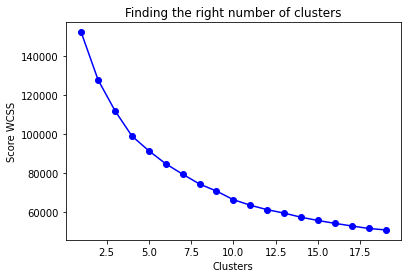

In [14]:
# plot the wcss vs number of cluster
# show blue dot 'bo' and connect it with a dash '-'
plt.plot(k_values, score_i, 'bo-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Score WCSS')
plt.show()

- From here, we can observe that cluster 4 seems to form the elbow of the curve
- However, the values doesn't reduce linearly until it reachs the 8th cluster.
- Let's choose the number of clusters to be 7.

#### Kmeans Model

In [20]:
kmeans = KMeans( n_clusters=8)
kmeans.fit(cc_df_scaled)
labels_1 = kmeans.labels_

In [21]:
print(labels_1)
print(labels_1.shape)
print(labels_1.min())
print(labels_1.max())

[2 0 7 ... 5 5 5]
(8950,)
0
7


In [22]:
kmeans.cluster_centers_

array([[ 1.69048099e+00,  3.91576083e-01, -2.18283652e-01,
        -1.56544264e-01, -2.28596903e-01,  2.02926750e+00,
        -4.78631974e-01, -2.13098495e-01, -4.15543113e-01,
         1.92590228e+00,  1.94032953e+00, -2.67148291e-01,
         1.03116218e+00,  8.25653562e-01,  5.12696791e-01,
        -3.90592605e-01,  6.88831601e-02],
       [-3.66739830e-01,  3.33338380e-01, -3.85389595e-02,
        -2.44302992e-01,  3.57516154e-01, -3.63618503e-01,
         9.90253126e-01, -3.87060270e-01,  1.20549554e+00,
        -4.75146398e-01, -3.61199635e-01,  1.86768973e-01,
        -2.61315649e-01, -2.17939671e-01, -4.59793867e-02,
         3.14958533e-01,  2.57483792e-01],
       [ 1.90193418e-02,  4.03647144e-01, -3.61346839e-01,
        -2.46584238e-01, -4.01268438e-01, -9.02676269e-02,
        -8.66231913e-01, -4.09461268e-01, -7.57937175e-01,
         1.11881564e-01, -2.24062500e-02, -4.86197920e-01,
        -3.04509739e-01, -2.49398697e-01, -3.79335273e-03,
        -4.56956123e-01,  2.7

#### Insert the Labels to the Dataframe

In [23]:
cc_df_cluster  = pd.concat([cc_df, pd.DataFrame({'cluster': labels_1})], axis=1)
cc_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


#### Histogram on Various Cluster

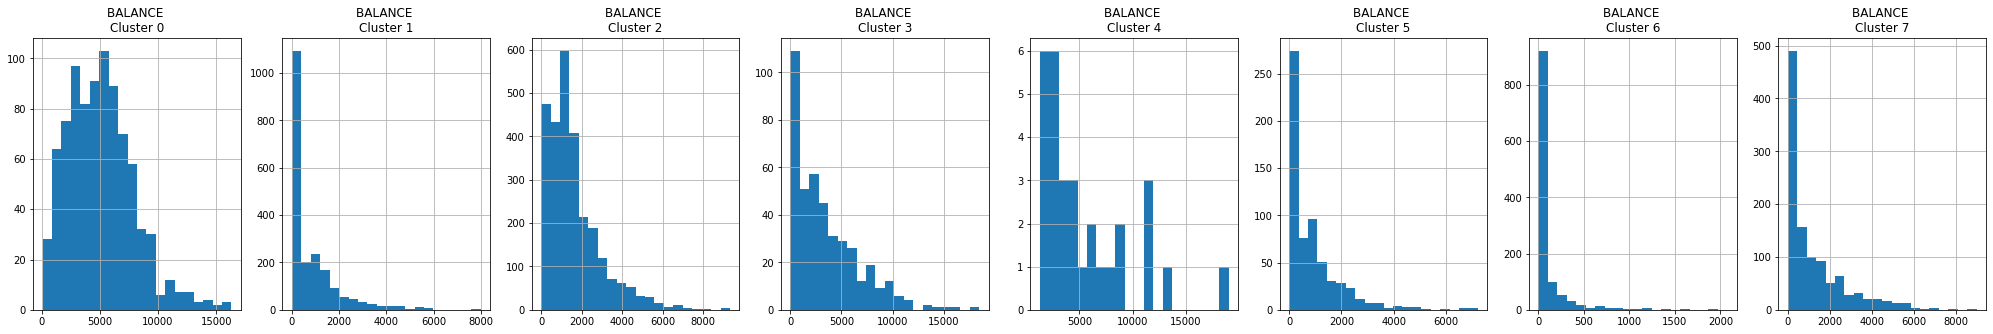

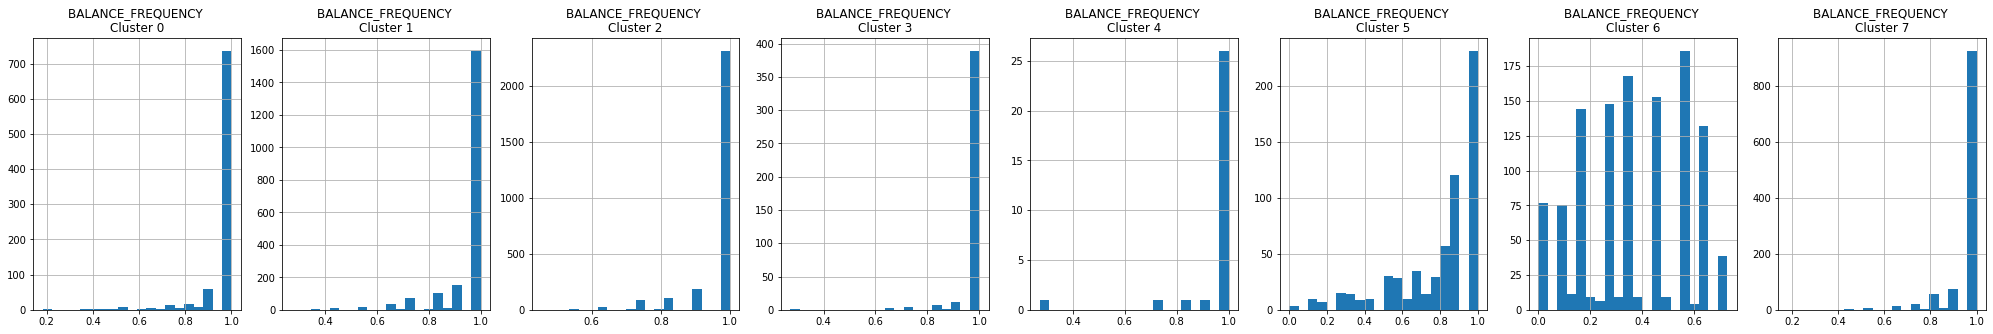

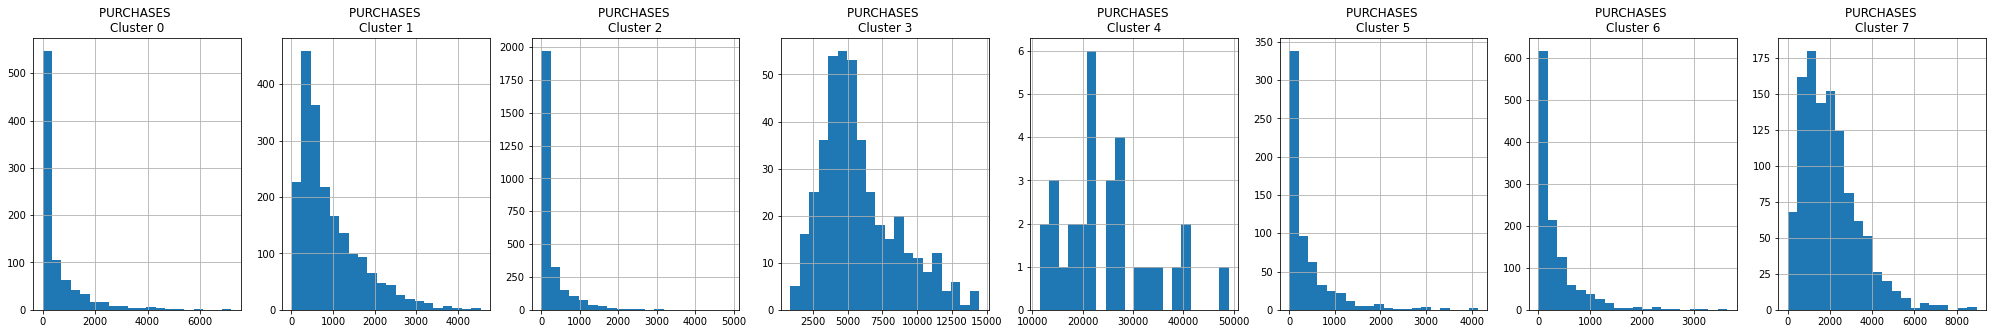

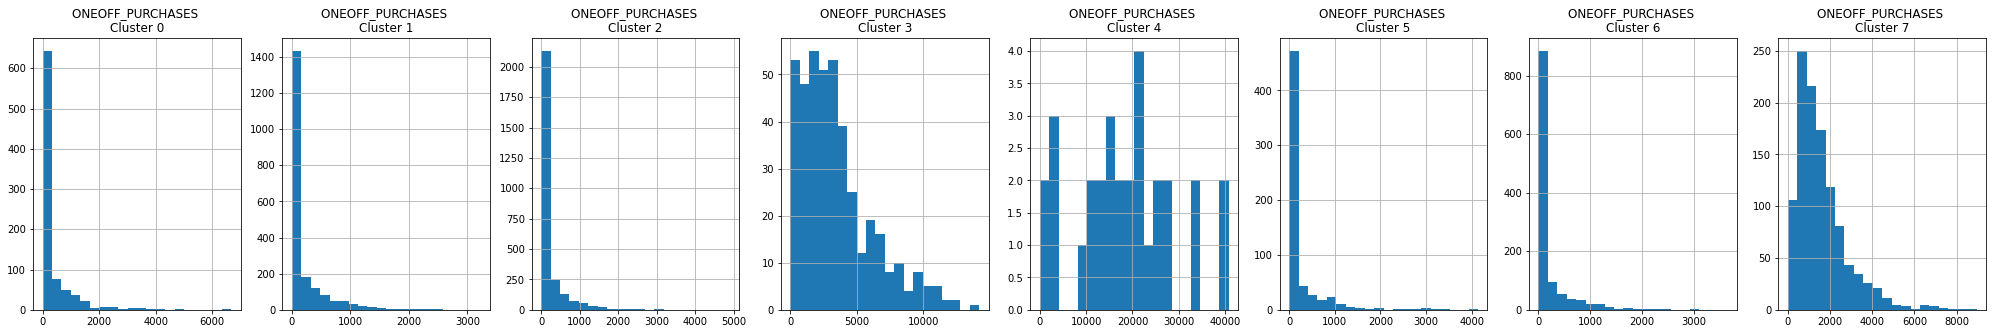

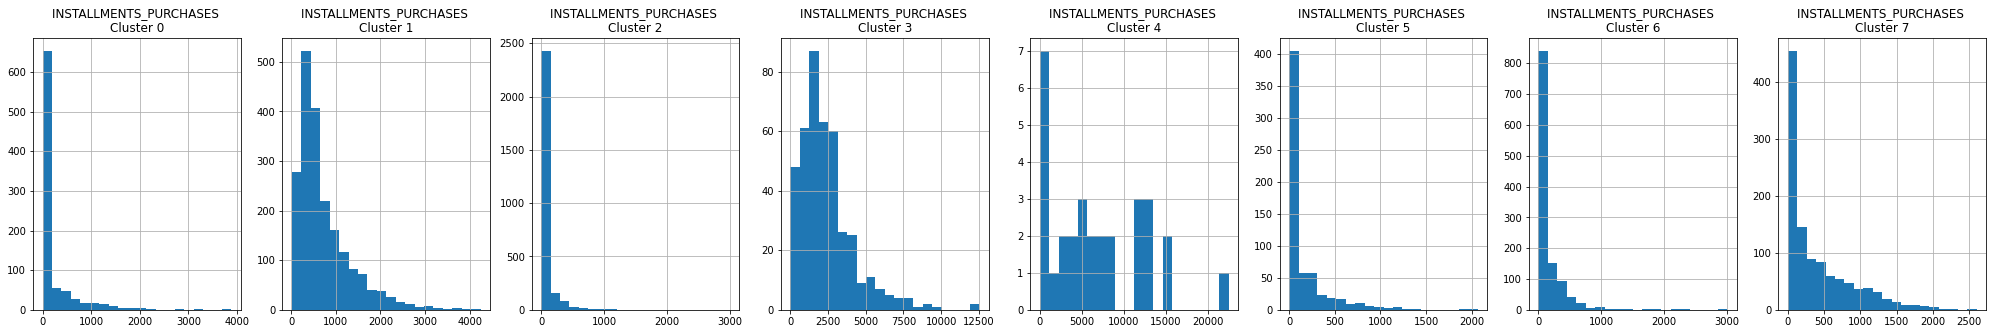

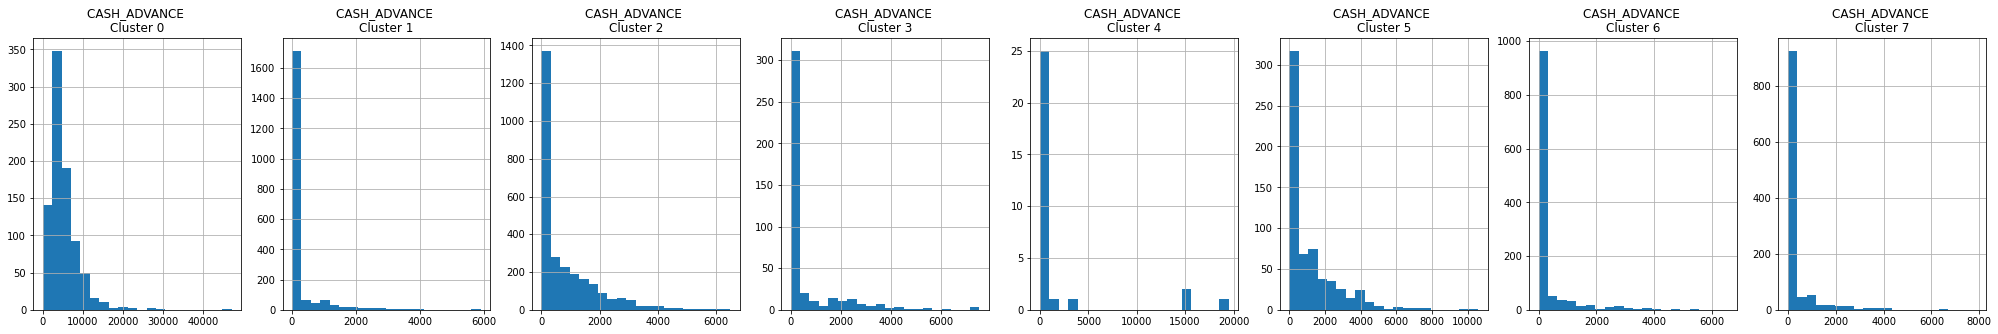

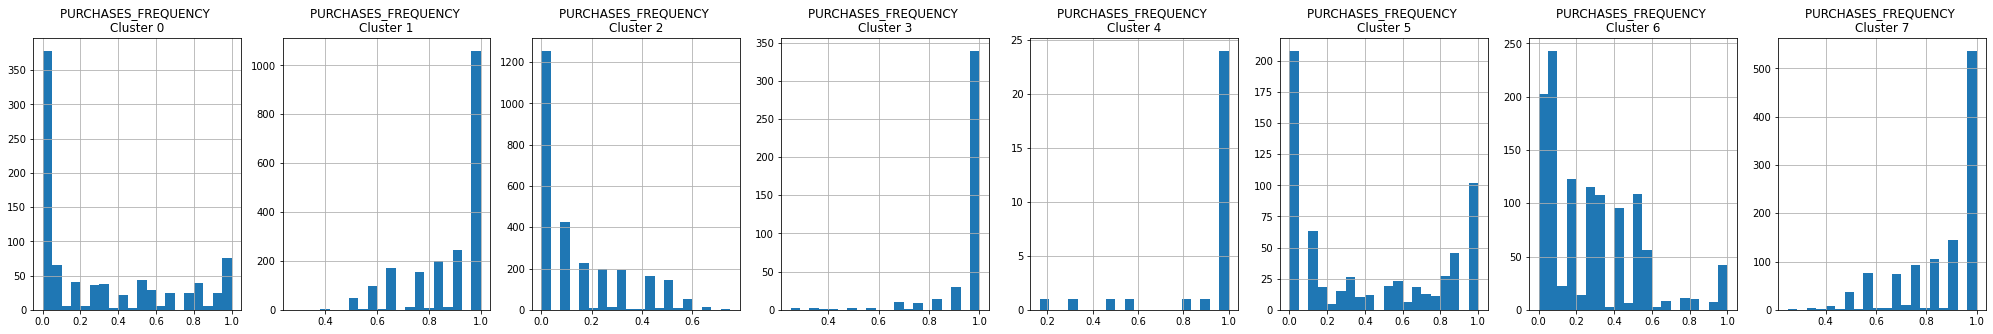

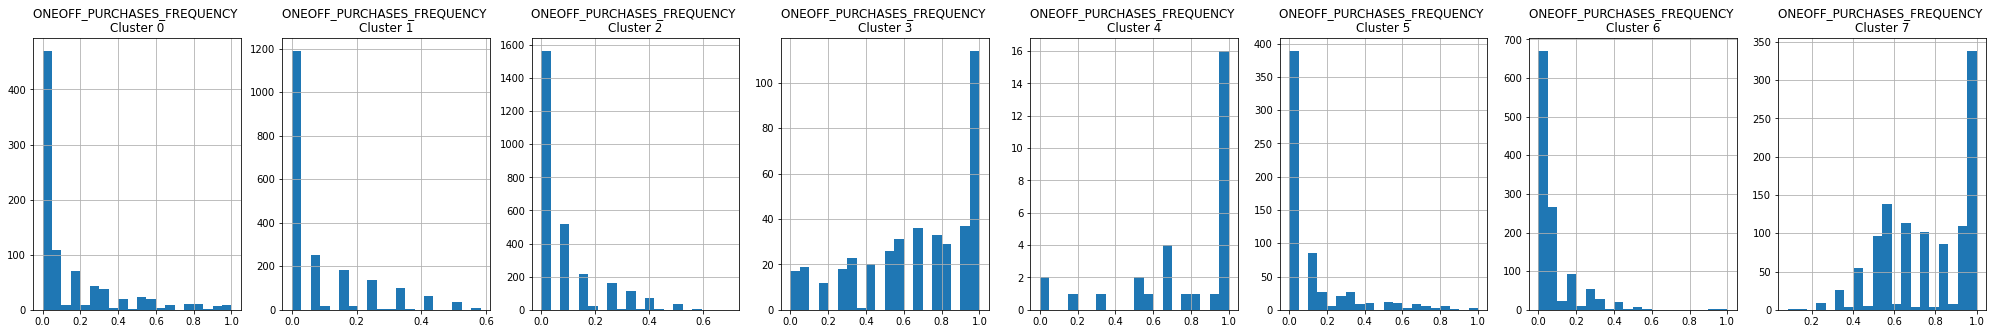

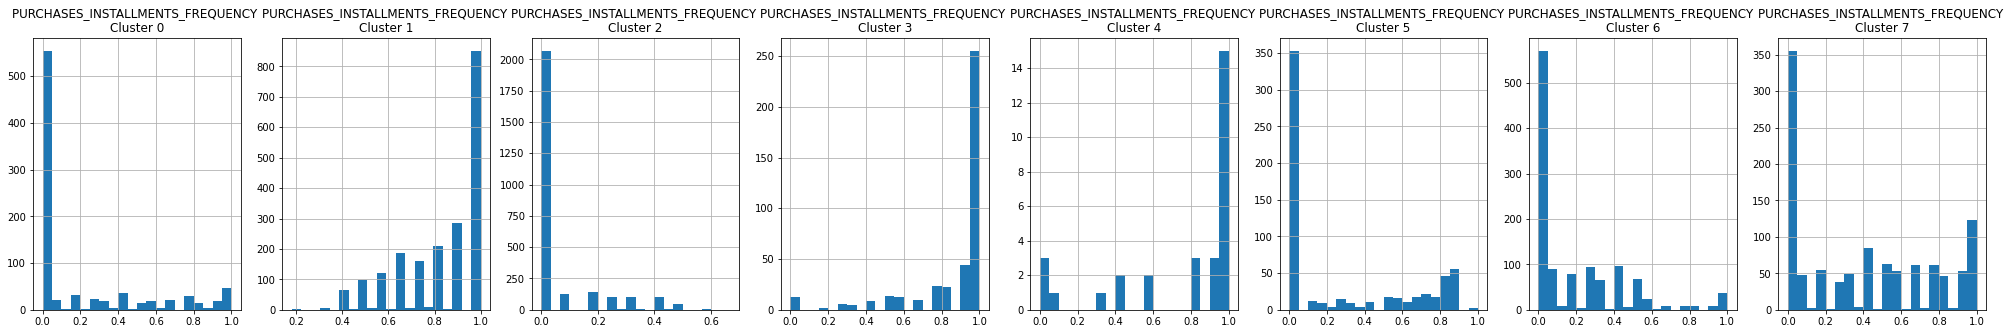

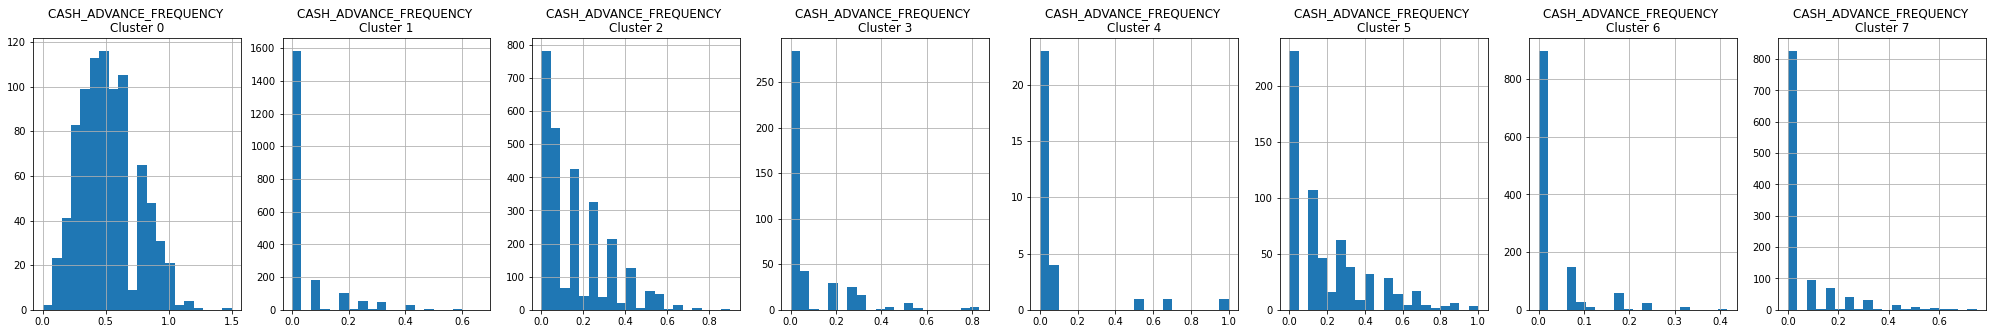

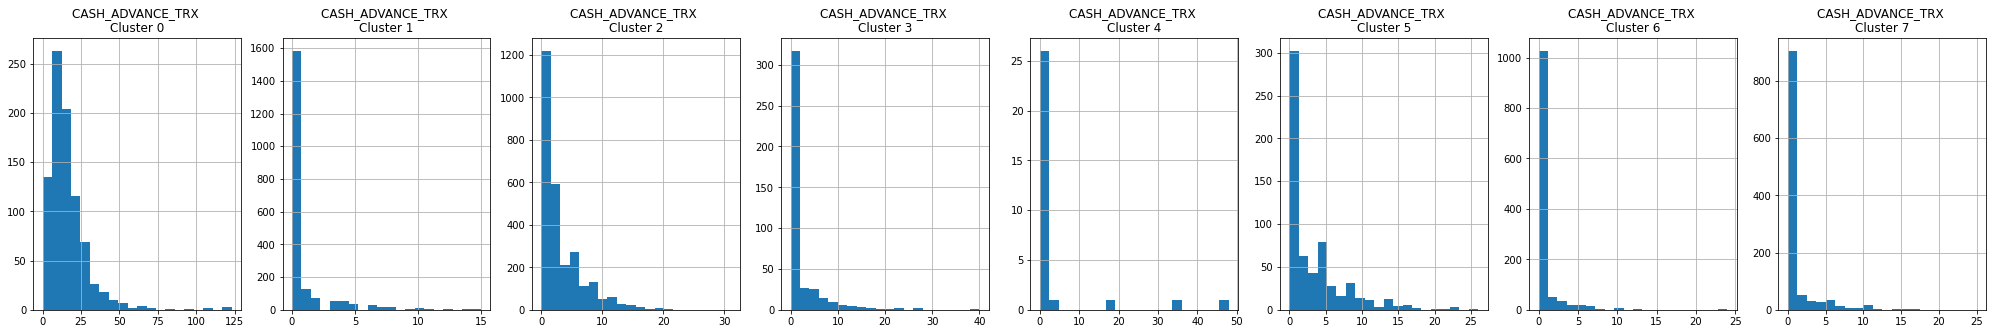

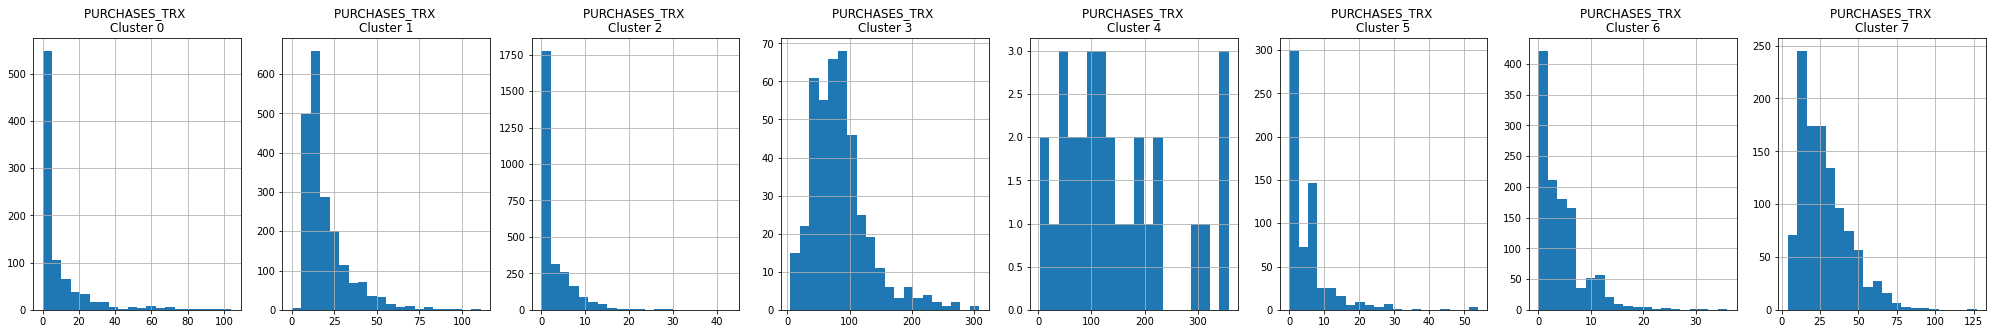

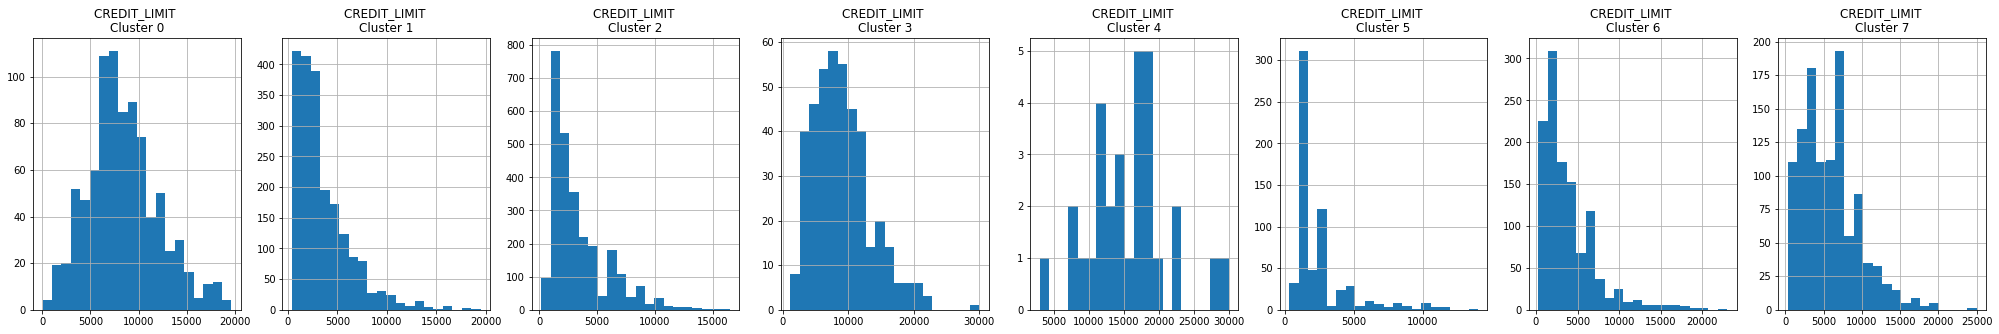

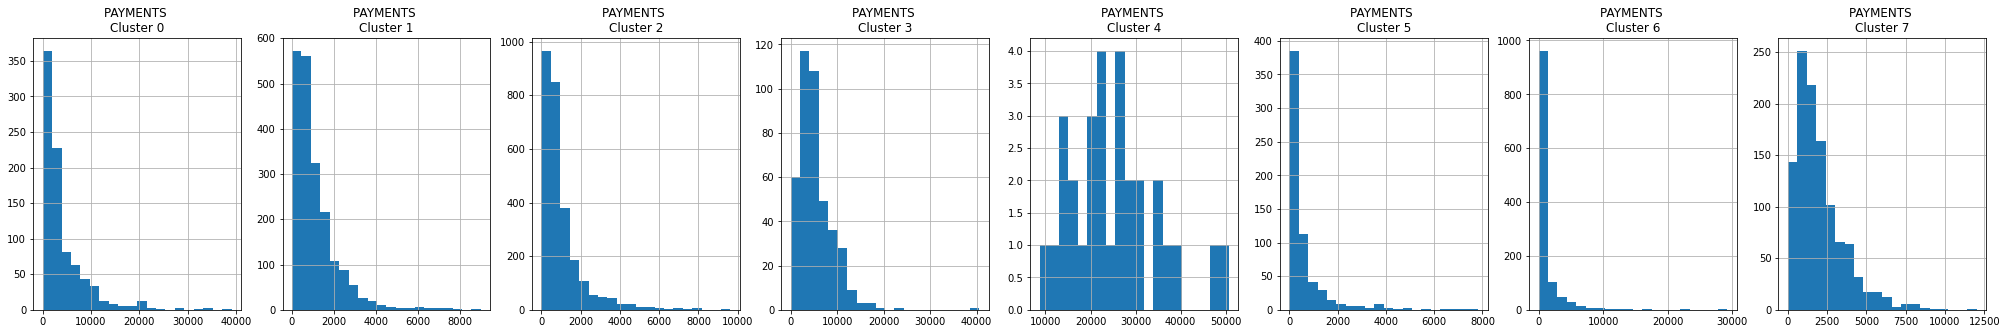

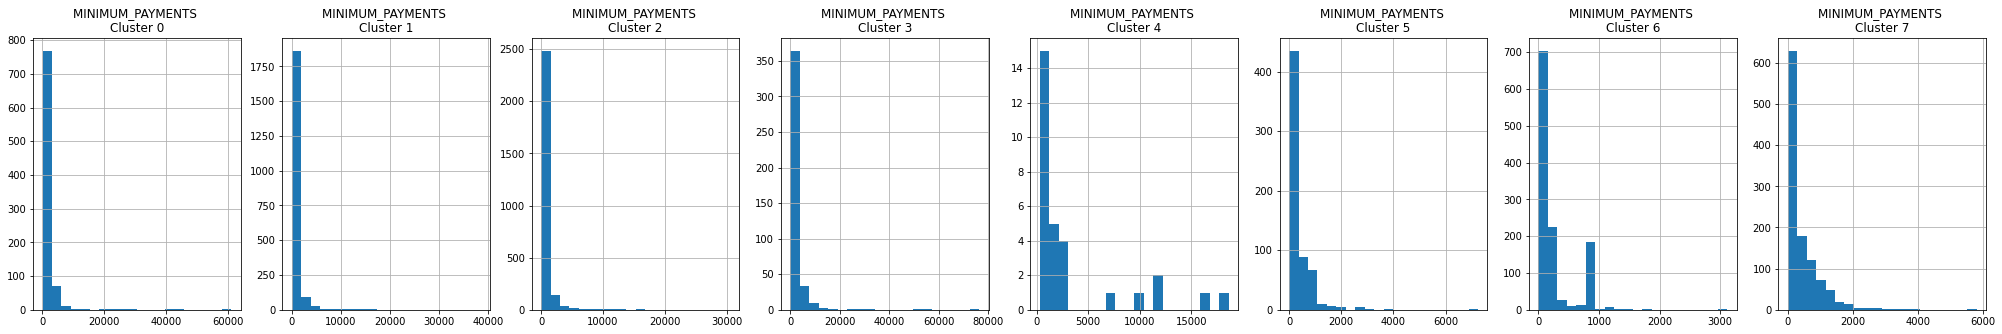

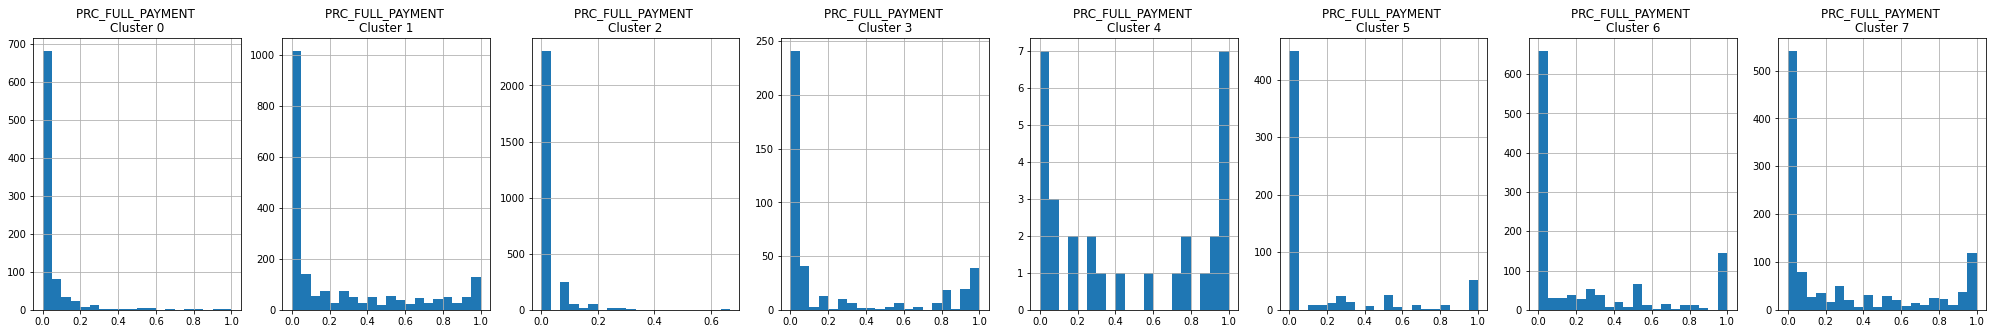

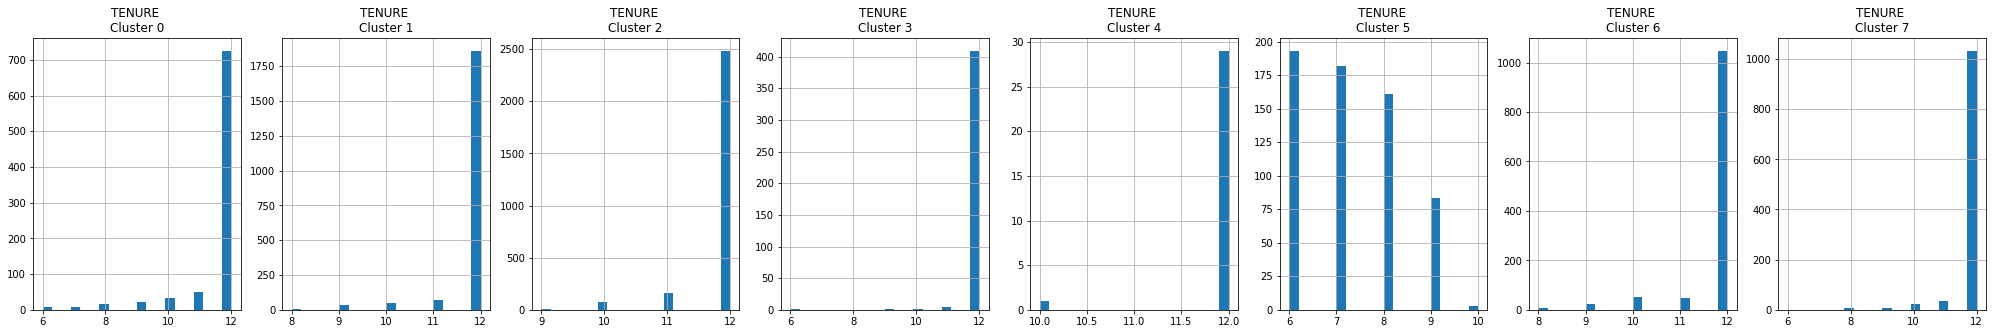

In [24]:
columns = cc_df.columns

# Plot the histogram on various cluster
for col in columns:
    # create a horizontal figure (width = 35, height = 5)
    plt.figure( figsize=(35,5))
    for group in range(8):
        # in the figure, it will consist of 8 plots horizontally alligned
        plt.subplot(1, 8, group+1)
        cluster = cc_df[cc_df_cluster.cluster == group]
        cluster[col].hist( bins=20)
        plt.title('{} \nCluster {}'.format(col, group))
plt.show()

#### Clusters Analysis

In [25]:
columns = cc_df.columns

cluster_centers = pd.DataFrame( data=kmeans.cluster_centers_, columns= [columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.690481,0.391576,-0.218284,-0.156544,-0.228597,2.029267,-0.478632,-0.213098,-0.415543,1.925902,1.940330,-0.267148,1.031162,0.825654,0.512697,-0.390593,0.068883
1,-0.366740,0.333338,-0.038539,-0.244303,0.357516,-0.363619,0.990253,-0.387060,1.205496,-0.475146,-0.361200,0.186769,-0.261316,-0.217940,-0.045979,0.314959,0.257484
2,0.019019,0.403647,-0.361347,-0.246584,-0.401268,-0.090268,-0.866232,-0.409461,-0.757937,0.111882,-0.022406,-0.486198,-0.304510,-0.249399,-0.003793,-0.456956,0.272527
3,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
4,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
7,-0.165519,0.391713,0.473681,0.618368,-0.016186,-0.333808,0.944946,1.881375,0.089953,-0.408068,-0.324367,0.531698,0.380812,0.101691,-0.162832,0.415626,0.262714


In [26]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame( data=cluster_centers, columns= [columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5083.068323,0.970031,536.838447,332.605956,204.350301,5234.339850,0.298252,0.138886,0.199290,0.520537,16.490151,8.069525,8246.239334,4123.330014,2059.024786,0.039473,11.609502
1,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898
2,1604.061982,0.972891,231.181742,183.158041,48.205575,789.575682,0.142690,0.080307,0.063214,0.157533,3.095921,2.624770,3386.518437,1011.159060,855.366294,0.020063,11.882029
3,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
7,1219.960074,0.970064,2015.232450,1618.801383,396.431067,278.861158,0.869603,0.763708,0.400187,0.053486,1.035262,27.925859,5879.997534,2027.528654,484.732765,0.275278,11.868897


In [27]:
cc_df_cluster.cluster.value_counts()

2    2721
1    2013
6    1179
7    1106
0     863
5     622
3     416
4      30
Name: cluster, dtype: int64

## Principle Component Analysis

### PCA Model

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA( n_components=2)
pca_model = pca.fit_transform(cc_df_scaled)
pca_model

array([[-1.68222198, -1.07645108],
       [-1.13830344,  2.50645954],
       [ 0.96968764, -0.38350632],
       ...,
       [-0.92620294, -1.81078253],
       [-2.3365523 , -0.65797518],
       [-0.55642009, -0.40047706]])

In [30]:
# create a dataframe with two components
pca_df = pd.DataFrame( data=pca_model, columns=['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,-1.682222,-1.076451
1,-1.138303,2.506460
2,0.969688,-0.383506
3,-0.873628,0.043181
4,-1.599436,-0.688585


### Insert the Labels from KMeans to the PCA DF

In [31]:
pca_df = pd.concat( [pca_df, pd.DataFrame({'cluster': labels_1})], axis=1)

In [32]:
pca_df

,pca_1,pca_2,cluster
0,-1.682222,-1.076451,2
1,-1.138303,2.506460,0
2,0.969688,-0.383506,7
3,-0.873628,0.043181,2
4,-1.599436,-0.688585,2
...,...,...,...
8945,-0.359629,-2.016143,5
8946,-0.564367,-1.639111,5
8947,-0.926203,-1.810783,5
8948,-2.336552,-0.657975,5


### Visualize the PCA with Scatter Plot

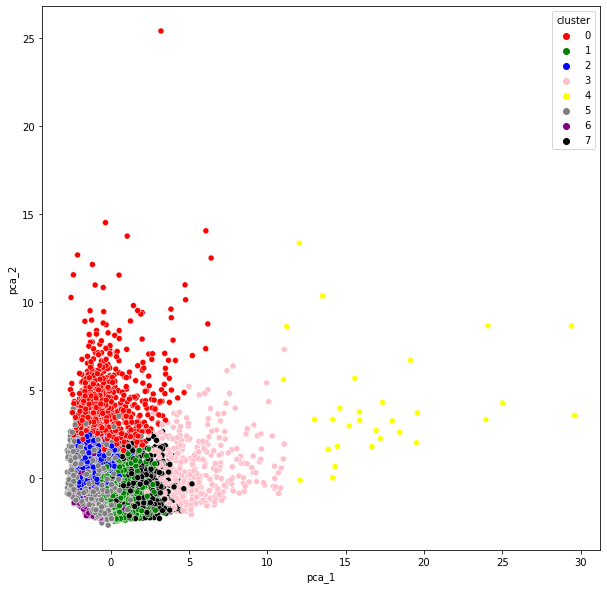

In [33]:
plt.figure( figsize=(10,10))
sns.scatterplot(x=pca_df.pca_1, 
                y=pca_df.pca_2, 
                hue=pca_df.cluster, 
                palette=['red', 'green','blue', 'pink', 'yellow', 'grey', 'purple', 'black'])
plt.show()

### Auto Encoder Model

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [35]:
input_model = Input( shape=(17,))
x = Dense(7, activation='relu')(input_model)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, activation='relu', kernel_initializer='glorot_uniform')(x)

# Auto encoder
autoencoder = Model(input_model, decoded)

# Encoder
encoder = Model(input_model, encoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [36]:
# Compile the 
autoencoder.compile( optimizer='adam', loss='mean_squared_error')

In [37]:
autoencoder.fit(x= cc_df_scaled, y=cc_df_scaled, batch_size=128, epochs=50, verbose=1)

Epoch 1/50
70/70 [==============================] - 8s 72ms/step - loss: 0.7844
Epoch 2/50
70/70 [==============================] - 4s 57ms/step - loss: 0.6608
Epoch 3/50
70/70 [==============================] - 5s 65ms/step - loss: 0.6307
Epoch 4/50
70/70 [==============================] - 4s 60ms/step - loss: 0.5820
Epoch 5/50
70/70 [==============================] - 4s 55ms/step - loss: 0.5541
Epoch 6/50
70/70 [==============================] - 4s 59ms/step - loss: 0.5447
Epoch 7/50
70/70 [==============================] - 4s 60ms/step - loss: 0.5276
Epoch 8/50
70/70 [==============================] - 4s 61ms/step - loss: 0.5042
Epoch 9/50
70/70 [==============================] - 4s 59ms/step - loss: 0.4967
Epoch 10/50
70/70 [==============================] - 4s 64ms/step - loss: 0.5008
Epoch 11/50
70/70 [==============================] - 4s 62ms/step - loss: 0.5066
Epoch 12/50
70/70 [==============================] - 4s 59ms/step - loss: 0.4821
Epoch 13/50
70/70 [==================

### Encoder Model


In [38]:
pred = encoder.predict(cc_df_scaled)
pred

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0940174 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.63907063,
        0.74976593],
       [0.        , 0.        , 0.        , ..., 0.        , 0.44368038,
        0.6463388 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.8470916 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18514949,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.0988479 ,
        0.        ]], dtype=float32)

In [39]:
pred.shape

(8950, 10)

- just encoded the input from 17 to 10 features with the same number of data. 

### Use KMeans with the Predicton from Encoder

In [40]:
score_k = []
k_values = range(1,20)
for k in k_values:
    temp = KMeans(n_clusters=k)
    temp.fit(pred)
    score_k.append(temp.inertia_)
score_k

[42720.328125,
 29455.345703125,
 24538.73828125,
 21709.0234375,
 19484.06640625,
 17751.734375,
 16440.7421875,
 15338.7255859375,
 14328.080078125,
 13694.35546875,
 13109.7548828125,
 12552.71484375,
 11986.224609375,
 11571.630859375,
 11233.2578125,
 10810.1337890625,
 10608.7001953125,
 10219.435546875,
 9919.533203125]

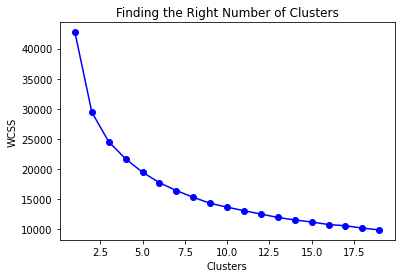

In [41]:
# plt.figure( figsize=(10,10))
plt.plot(k_values, score_k, 'bo-')
plt.title('Finding the Right Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

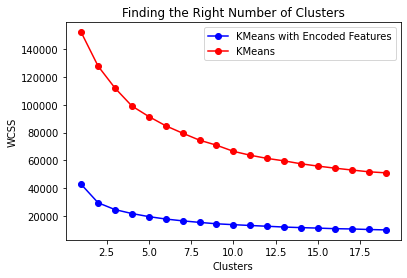

In [42]:
plt.plot(k_values, score_k, 'bo-', label='KMeans with Encoded Features')
plt.plot(k_values, score_i, 'ro-', label='KMeans')
plt.legend()
plt.title('Finding the Right Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans_2 = KMeans(n_clusters=4)
kmeans_2.fit(pred)
labels_2 = kmeans_2.labels_

In [44]:
cc_df_cluster_2 = pd.concat([ cc_df, pd.DataFrame({'cluster': labels_2})], axis=1)
cc_df_cluster_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### Use PCA to Perform more Dimensionality Reduction

In [45]:
pca_model_2 = pca.fit_transform(pred)
pca_model_2

array([[-1.1966733 , -0.03991589],
       [ 0.90752465,  1.6143416 ],
       [ 0.27844524, -0.23358949],
       ...,
       [-0.9627684 , -0.30178788],
       [-1.2137991 ,  0.06223983],
       [-0.3828758 , -0.0700592 ]], dtype=float32)

In [46]:
pca_df_2 = pd.DataFrame( data=pca_model_2, columns=['pca1', 'pca2'])
pca_df_2

,pca1,pca2
0,-1.196673,-0.039916
1,0.907525,1.614342
2,0.278445,-0.233589
3,-0.991911,0.071317
4,-1.079173,0.051983
...,...,...
8945,-0.575671,-0.388226
8946,-0.539649,-0.382303
8947,-0.962768,-0.301788
8948,-1.213799,0.062240


In [47]:
pca_df_2 = pd.concat([pca_df_2, pd.DataFrame({'cluster': labels_2})], axis=1)
pca_df_2                    

,pca1,pca2,cluster
0,-1.196673,-0.039916,0
1,0.907525,1.614342,2
2,0.278445,-0.233589,0
3,-0.991911,0.071317,0
4,-1.079173,0.051983,0
...,...,...,...
8945,-0.575671,-0.388226,0
8946,-0.539649,-0.382303,0
8947,-0.962768,-0.301788,0
8948,-1.213799,0.062240,0


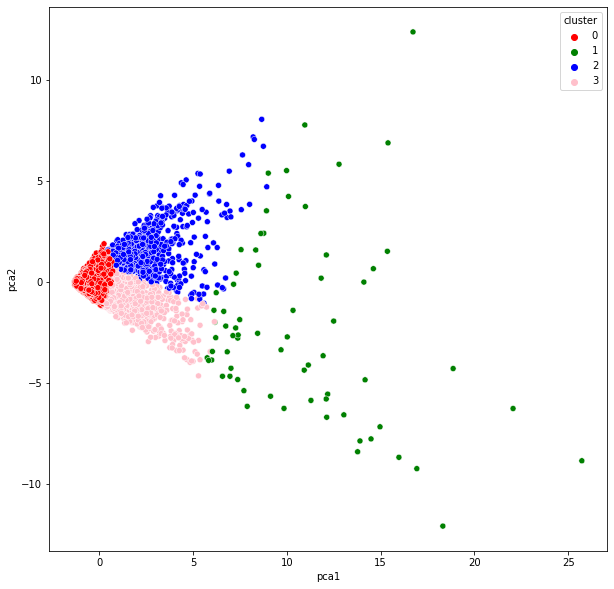

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=pca_df_2.pca1, 
                y=pca_df_2.pca2, 
                hue=pca_df_2.cluster, 
                palette=['red', 'green','blue', 'pink'])
plt.show()